# Raw_data_vgg16

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from keras import optimizers, losses, activations, models
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
training_dir = 'C:/Users/ASUS/Desktop/waveVgg/train'
validation_dir = 'C:/Users/ASUS/Desktop/waveVgg/valid'
test_dir = 'C:/Users/ASUS/Desktop/waveVgg/test'

In [3]:
image_files = glob(training_dir + '/*/*.png')
valid_image_files = glob(validation_dir + '/*/*.png')

In [4]:
folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 2


In [5]:
import tensorflow as tf 
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense
#from keras.preprocessing import image

IMAGE_SIZE = [64, 64]  # we will keep the image size as (64,64). You can increase the size for better results. 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
#x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

training_datagen = ImageDataGenerator(
                                    rescale=1./255,   # all pixel values will be between 0 an 1
                                    shear_range=0, 
                                    zoom_range=0,
                                    horizontal_flip=False,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

training_generator = training_datagen.flow_from_directory(training_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')

Found 495 images belonging to 2 classes.
Found 145 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [8]:
import tensorflow as tf
from keras.models import *
from keras.layers import *
opt = tf.optimizers.Adam(lr=1e-3)
model.compile(optimizer=opt, 
    loss=losses.binary_crossentropy, 
    metrics=['accuracy', 'Precision', 'AUC', tf.keras.metrics.Recall(), tf.keras.metrics.TrueNegatives()])

C:\Users\ASUS\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
training_images = 495
validation_images = 145

history = model.fit(training_generator, # this should be equal to total number of images in training set. But to speed up the execution, I am only using 10000 images. Change this for better results. 
                   epochs = 100,  # change this for better results
                   validation_data = validation_generator)  # this should be equal to total number of images in validation set.

Epoch 1/100
3/3 [==============================] - 10s 3s/step - loss: 0.7664 - accuracy: 0.5253 - precision: 0.5253 - auc: 0.5336 - recall: 0.5253 - true_negatives: 260.0000 - val_loss: 0.7341 - val_accuracy: 0.5241 - val_precision: 0.5241 - val_auc: 0.4461 - val_recall: 0.5241 - val_true_negatives: 76.0000
Epoch 2/100
3/3 [==============================] - 8s 3s/step - loss: 0.6857 - accuracy: 0.5293 - precision: 0.5293 - auc: 0.5792 - recall: 0.5293 - true_negatives: 262.0000 - val_loss: 0.7358 - val_accuracy: 0.3724 - val_precision: 0.3724 - val_auc: 0.3186 - val_recall: 0.3724 - val_true_negatives: 54.0000
Epoch 3/100
3/3 [==============================] - 8s 3s/step - loss: 0.6783 - accuracy: 0.6222 - precision: 0.6222 - auc: 0.6461 - recall: 0.6222 - true_negatives: 308.0000 - val_loss: 0.7514 - val_accuracy: 0.3655 - val_precision: 0.3655 - val_auc: 0.3034 - val_recall: 0.3655 - val_true_negatives: 53.0000
Epoch 4/100
3/3 [==============================] - 8s 4s/step - loss: 0.

3/3 [==============================] - 11s 4s/step - loss: 0.4711 - accuracy: 0.7778 - precision: 0.7778 - auc: 0.8734 - recall: 0.7778 - true_negatives: 385.0000 - val_loss: 1.0345 - val_accuracy: 0.4276 - val_precision: 0.4276 - val_auc: 0.4260 - val_recall: 0.4276 - val_true_negatives: 62.0000
Epoch 54/100
3/3 [==============================] - 11s 3s/step - loss: 0.4706 - accuracy: 0.7798 - precision: 0.7798 - auc: 0.8736 - recall: 0.7798 - true_negatives: 386.0000 - val_loss: 1.0338 - val_accuracy: 0.4345 - val_precision: 0.4345 - val_auc: 0.4220 - val_recall: 0.4345 - val_true_negatives: 63.0000
Epoch 55/100
3/3 [==============================] - 11s 4s/step - loss: 0.4686 - accuracy: 0.7737 - precision: 0.7737 - auc: 0.8749 - recall: 0.7737 - true_negatives: 383.0000 - val_loss: 1.0426 - val_accuracy: 0.4414 - val_precision: 0.4414 - val_auc: 0.4253 - val_recall: 0.4414 - val_true_negatives: 64.0000
Epoch 56/100
3/3 [==============================] - 9s 4s/step - loss: 0.4665 - 

In [10]:
import statistics
print (statistics.mean(history.history['accuracy']))
print (statistics.mean(history.history['val_accuracy']))

0.7663434338569641
0.44875862121582033


loss


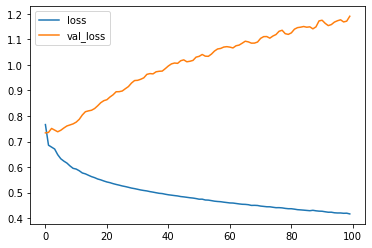

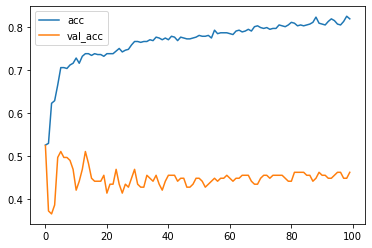

In [11]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
print('loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [12]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 872ms/step - loss: 0.9713 - accuracy: 0.4697 - precision: 0.4697 - auc: 0.4828 - recall: 0.4697 - true_negatives: 31.0000


[0.9712976217269897,
 0.469696968793869,
 0.469696968793869,
 0.48278239369392395,
 0.469696968793869,
 31.0]